#Plot ERS Orbit Files

In [6]:
%matplotlib inline

Orbit files are available approximately every 100 minutes, because that's the time the satellite takes for one complete orbit:
<br><br>
<img src='http://www.fe-lexikon.info/images/poes_orbit1.gif'>
<br><br>
You can plot different files in order to get an impression of how the satellite swath changes over time.<br>
Here's a list of all orbit files of January 1, 1998. To plot another file, just change "ers_name" accordingly and run the code again by hitting Shift+Enter:
<br><br>
'ASPS20_H_980101000717.nc'<br>
'ASPS20_H_980101014753.nc'<br>
'ASPS20_H_980101032829.nc'<br>
'ASPS20_H_980101050905.nc'<br>
'ASPS20_H_980101064941.nc'<br>
'ASPS20_H_980101083017.nc'<br>
'ASPS20_H_980101101053.nc'<br>
'ASPS20_H_980101115129.nc'<br>
'ASPS20_H_980101133204.nc'<br>
'ASPS20_H_980101151240.nc'<br>
'ASPS20_H_980101165316.nc'<br>
'ASPS20_H_980101183352.nc'<br>
'ASPS20_H_980101201429.nc'<br>
'ASPS20_H_980101215505.nc'<br>
'ASPS20_H_980101233540.nc'

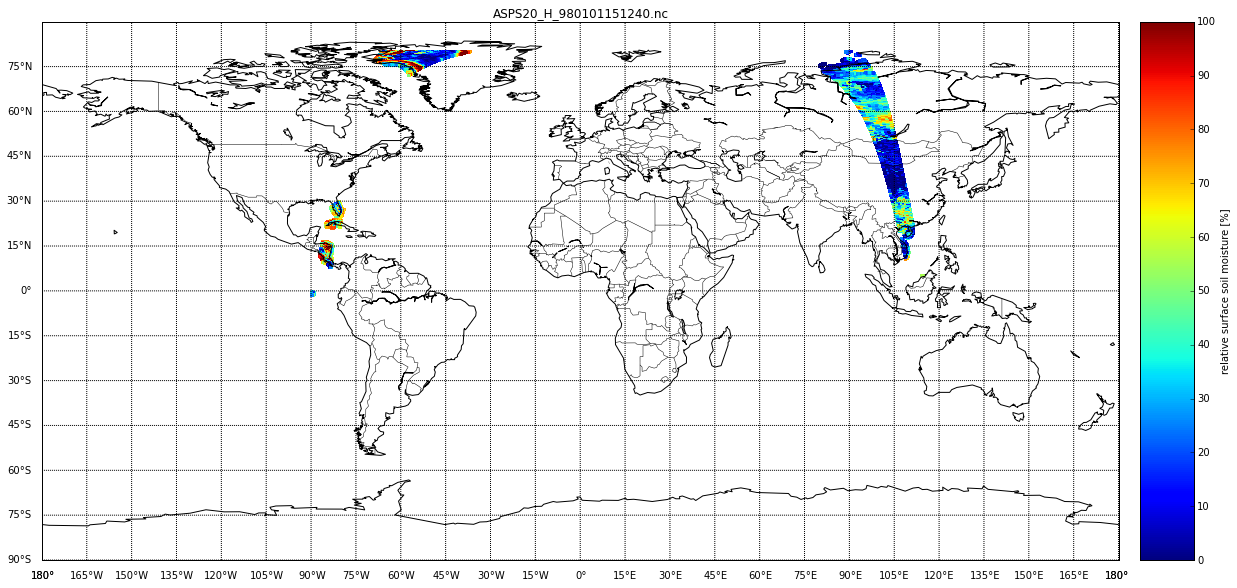

In [34]:
from netCDF4 import Dataset
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pytesmo.colormaps.load_cmap as smcolormaps

ers_path = '/IPF/ipfeil/R/Datapool_processed/ERS/gpod_netcdf/1998/01/'

# change "ers_name" to plot different swaths
ers_name = 'ASPS20_H_980101151240.nc'

ers_file = os.path.join(ers_path, ers_name)

nfile = Dataset(ers_file, 'r')
sm_data = nfile.variables['SSM'][:]
lons = nfile.variables['lon'][:]
lats = nfile.variables['lat'][:]
nfile.close()

fig = plt.figure(figsize=(20,20))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
m = Basemap(projection='cyl', ax=ax)
m.drawcoastlines()
m.drawcountries()
#draw parallels and meridians.
#label on left and bottom of map.
parallels = np.arange(-90,90,15.)
m.drawparallels(parallels,labels=[1,0,0,0])
meridians = np.arange(-180,180,15.)
m.drawmeridians(meridians,labels=[0,0,0,1])
sc = m.scatter(lons, lats, c=sm_data, edgecolor="None", marker="s", s=10)
cb = m.colorbar(sc,"right", size="5%", pad='2%')
cb.set_label('relative surface soil moisture [%]')
plt.title(ers_name)
plt.show()